# Подключение библиотек

In [1]:
using PyCall
np = pyimport("numpy")
using DifferentialEquations
using DynamicalSystems
using PyPlot
#using DiffEqDevTools
#using ProbNumDiffEq
#using OrdinaryDiffEq
using DiffEqCallbacks
#using DataFrames
using ForwardDiff
using Latexify, LaTeXStrings, SymEngine

# Импорт вспомогательных методов

In [2]:
#include("Utils\\BS_Sin_System.jl")
include("Utils\\BS_Cos_System.jl")
include("Utils\\BS_Uni_System.jl")
include("Utils\\BS_Exp_System.jl")
include("Utils\\CallBack_Utils.jl")
include("Utils\\Sol_Converter.jl")

pushfirst!(PyVector(pyimport("sys")."path"), "")
GU =  pyimport("graphics_utils")

PyObject <module 'graphics_utils' from 'C:\\Users\\artyo\\YandexDisk\\Other\\Python\\coupled_contours_2\\graphics_utils.py'>

# Реализация ивентов

In [3]:
function myCond(u, t, integrator)
    return sin(u[1] - 0.25)
end

myCond (generic function with 1 method)

In [4]:
cb, observer_array = GetCallBack(myCond)

2-element Vector{Any}:
 ContinuousCallback{typeof(myCond), MySavingAffect{Float64, NTuple{6, Float64}}, Nothing, typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(myCond, MySavingAffect{Float64, NTuple{6, Float64}}(SavedValues{tType=Float64, savevalType=NTuple{6, Float64}}
t:
Float64[]
saveval:
NTuple{6, Float64}[]), nothing, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100)
 SavedValues{tType=Float64, savevalType=NTuple{6, Float64}}
t:
Float64[]
saveval:
NTuple{6, Float64}[]

# Параметры системы и НУ

In [5]:
function MyCoupleFunc(x)
    return 1/(1 + exp(50*(cos(x))))
end

MyCoupleFunc (generic function with 1 method)

In [32]:
func = BS_Cos_Sys
#func = BS_Exp_Sys
#func = BS_Uni_Sys(couple_exp)
#Jac = BS_Cos_Jac

K = 0.4
Eps = 1e-5
a2 = pi/2
a4 = pi

#a2 = pi/2
#a4 = pi

r = 0.1
#startPt = [3.141592653589786; 2.0776989018145287e-09; 6.283185307057817;
#           3.1415926535897944; 6.2831853071795605; 3.1415916495384404]

val = 0.0001
#startPt = [3.141592653589786 + val, 2.0776989018145287e-09 + val, 6.283185307057817 + val,
#            3.1415926535897944 + val, 6.2831853071795605 + val, 3.1415916495384404 + val]
startPt = [pi - val; 0 + val; 0 + val;
           pi - val; 0 + val; pi - val]

6-element Vector{Float64}:
 3.141492653589793
 0.0001
 0.0001
 3.141492653589793
 0.0001
 3.141492653589793

# Параметры интегратора

In [33]:
time_span = 100000.0
dt = 1e-5
abstol = 1e-15
reltol = 1e-15
alg = DP8()
maxiters = 1e10

1.0e10

In [34]:
prob_julia = ODEProblem(func, startPt, (0.0, time_span), [K, a2, a4, r, Eps])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100000.0)
u0: 6-element Vector{Float64}:
 3.141492653589793
 0.0001
 0.0001
 3.141492653589793
 0.0001
 3.141492653589793

# Интегрирование системы

In [35]:
sol_julia = solve(prob_julia, alg = alg, callback = cb, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=true); sol_julia.retcode

:Success

# Приведение структуры решения Julia к структуре Python

In [37]:
sol = jl2pySol(sol_julia, observer_array)

py_sol([0.0, 1.0e-5, 6.236606527197757e-5, 0.00028023022916066686, 0.001043367779419129, 0.0033588250442110235, 0.009901998575015645, 0.04082553759109732, 0.18642577451595926, 0.40999548491591103  …  99989.13496319865, 99990.76326867954, 99992.38266454662, 99993.8764224062, 99995.2493918613, 99996.51931872532, 99997.70192288648, 99998.80906085318, 99999.84955529013, 100000.0], [[3.141492653589793, 3.141492653989792, 3.1414926560844045, 3.141492664798374, 3.1414926953157964, 3.141492787852581, 3.1414930488863715, 3.1414942733497755, 3.1414998393683153, 3.1415077792342063  …  3110.176727053896, 3110.176727053897, 3110.1767270539017, 3110.1767270539162, 3110.1767270539553, 3110.17672705406, 3110.176727054318, 3110.176727054919, 3110.1767270562477, 3110.1767270565488], [0.0001, 0.00010000040000079734, 0.00010000249467371073, 0.0001000112098373472, 0.00010004174342104146, 0.0001001344432949536, 0.00010039686537362784, 0.00010164642816787292, 0.00010774210937081896, 0.00011782121864799382  …

# Временные диграммы

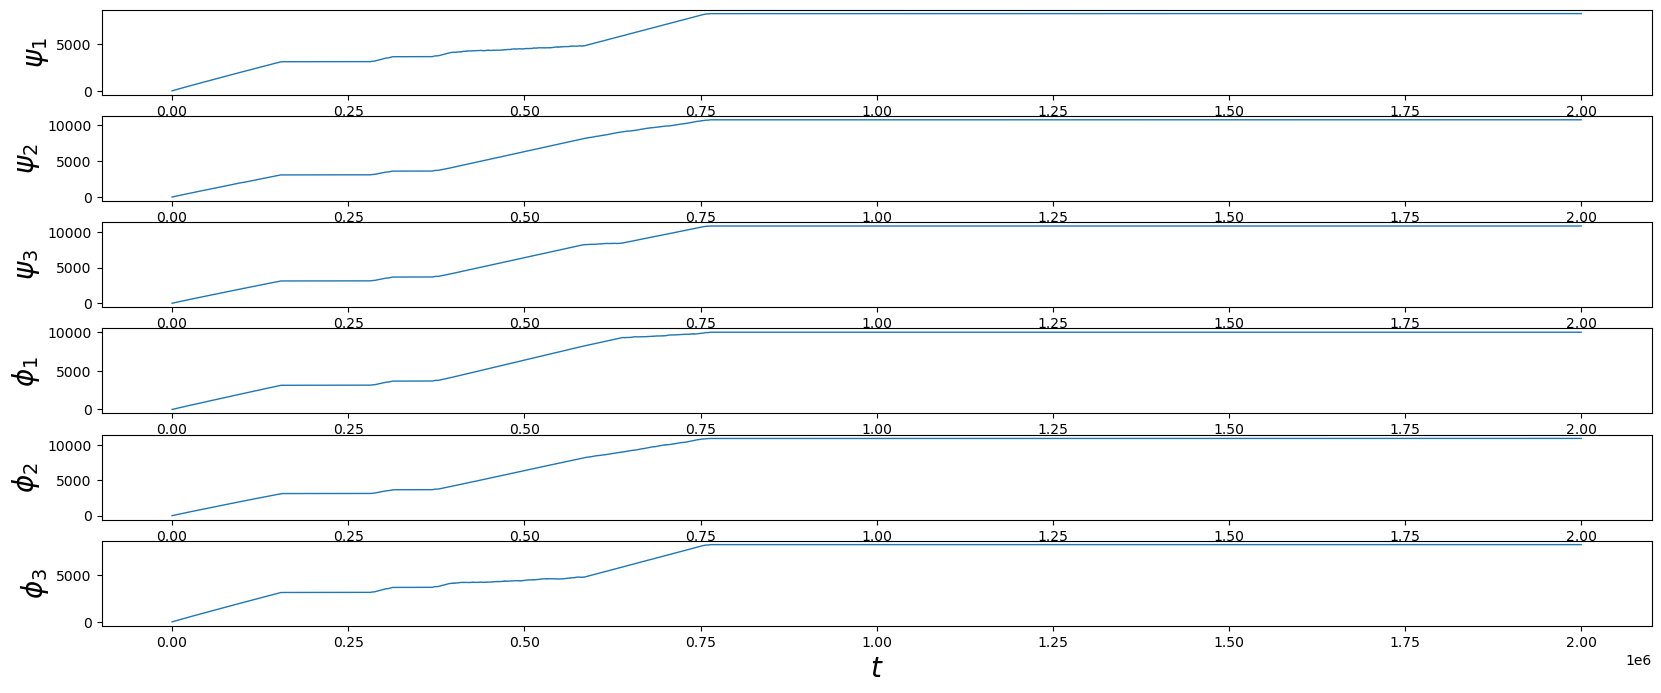

C:\Users\artyo\Dropbox\Other\Python\coupled_contours_2\graphics_utils.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [19]:
GU.plotTimeSeries(sol, GU.projNone, "tst-stuff.png", Dict([("linewidth", 1)]))

# Проекции решения

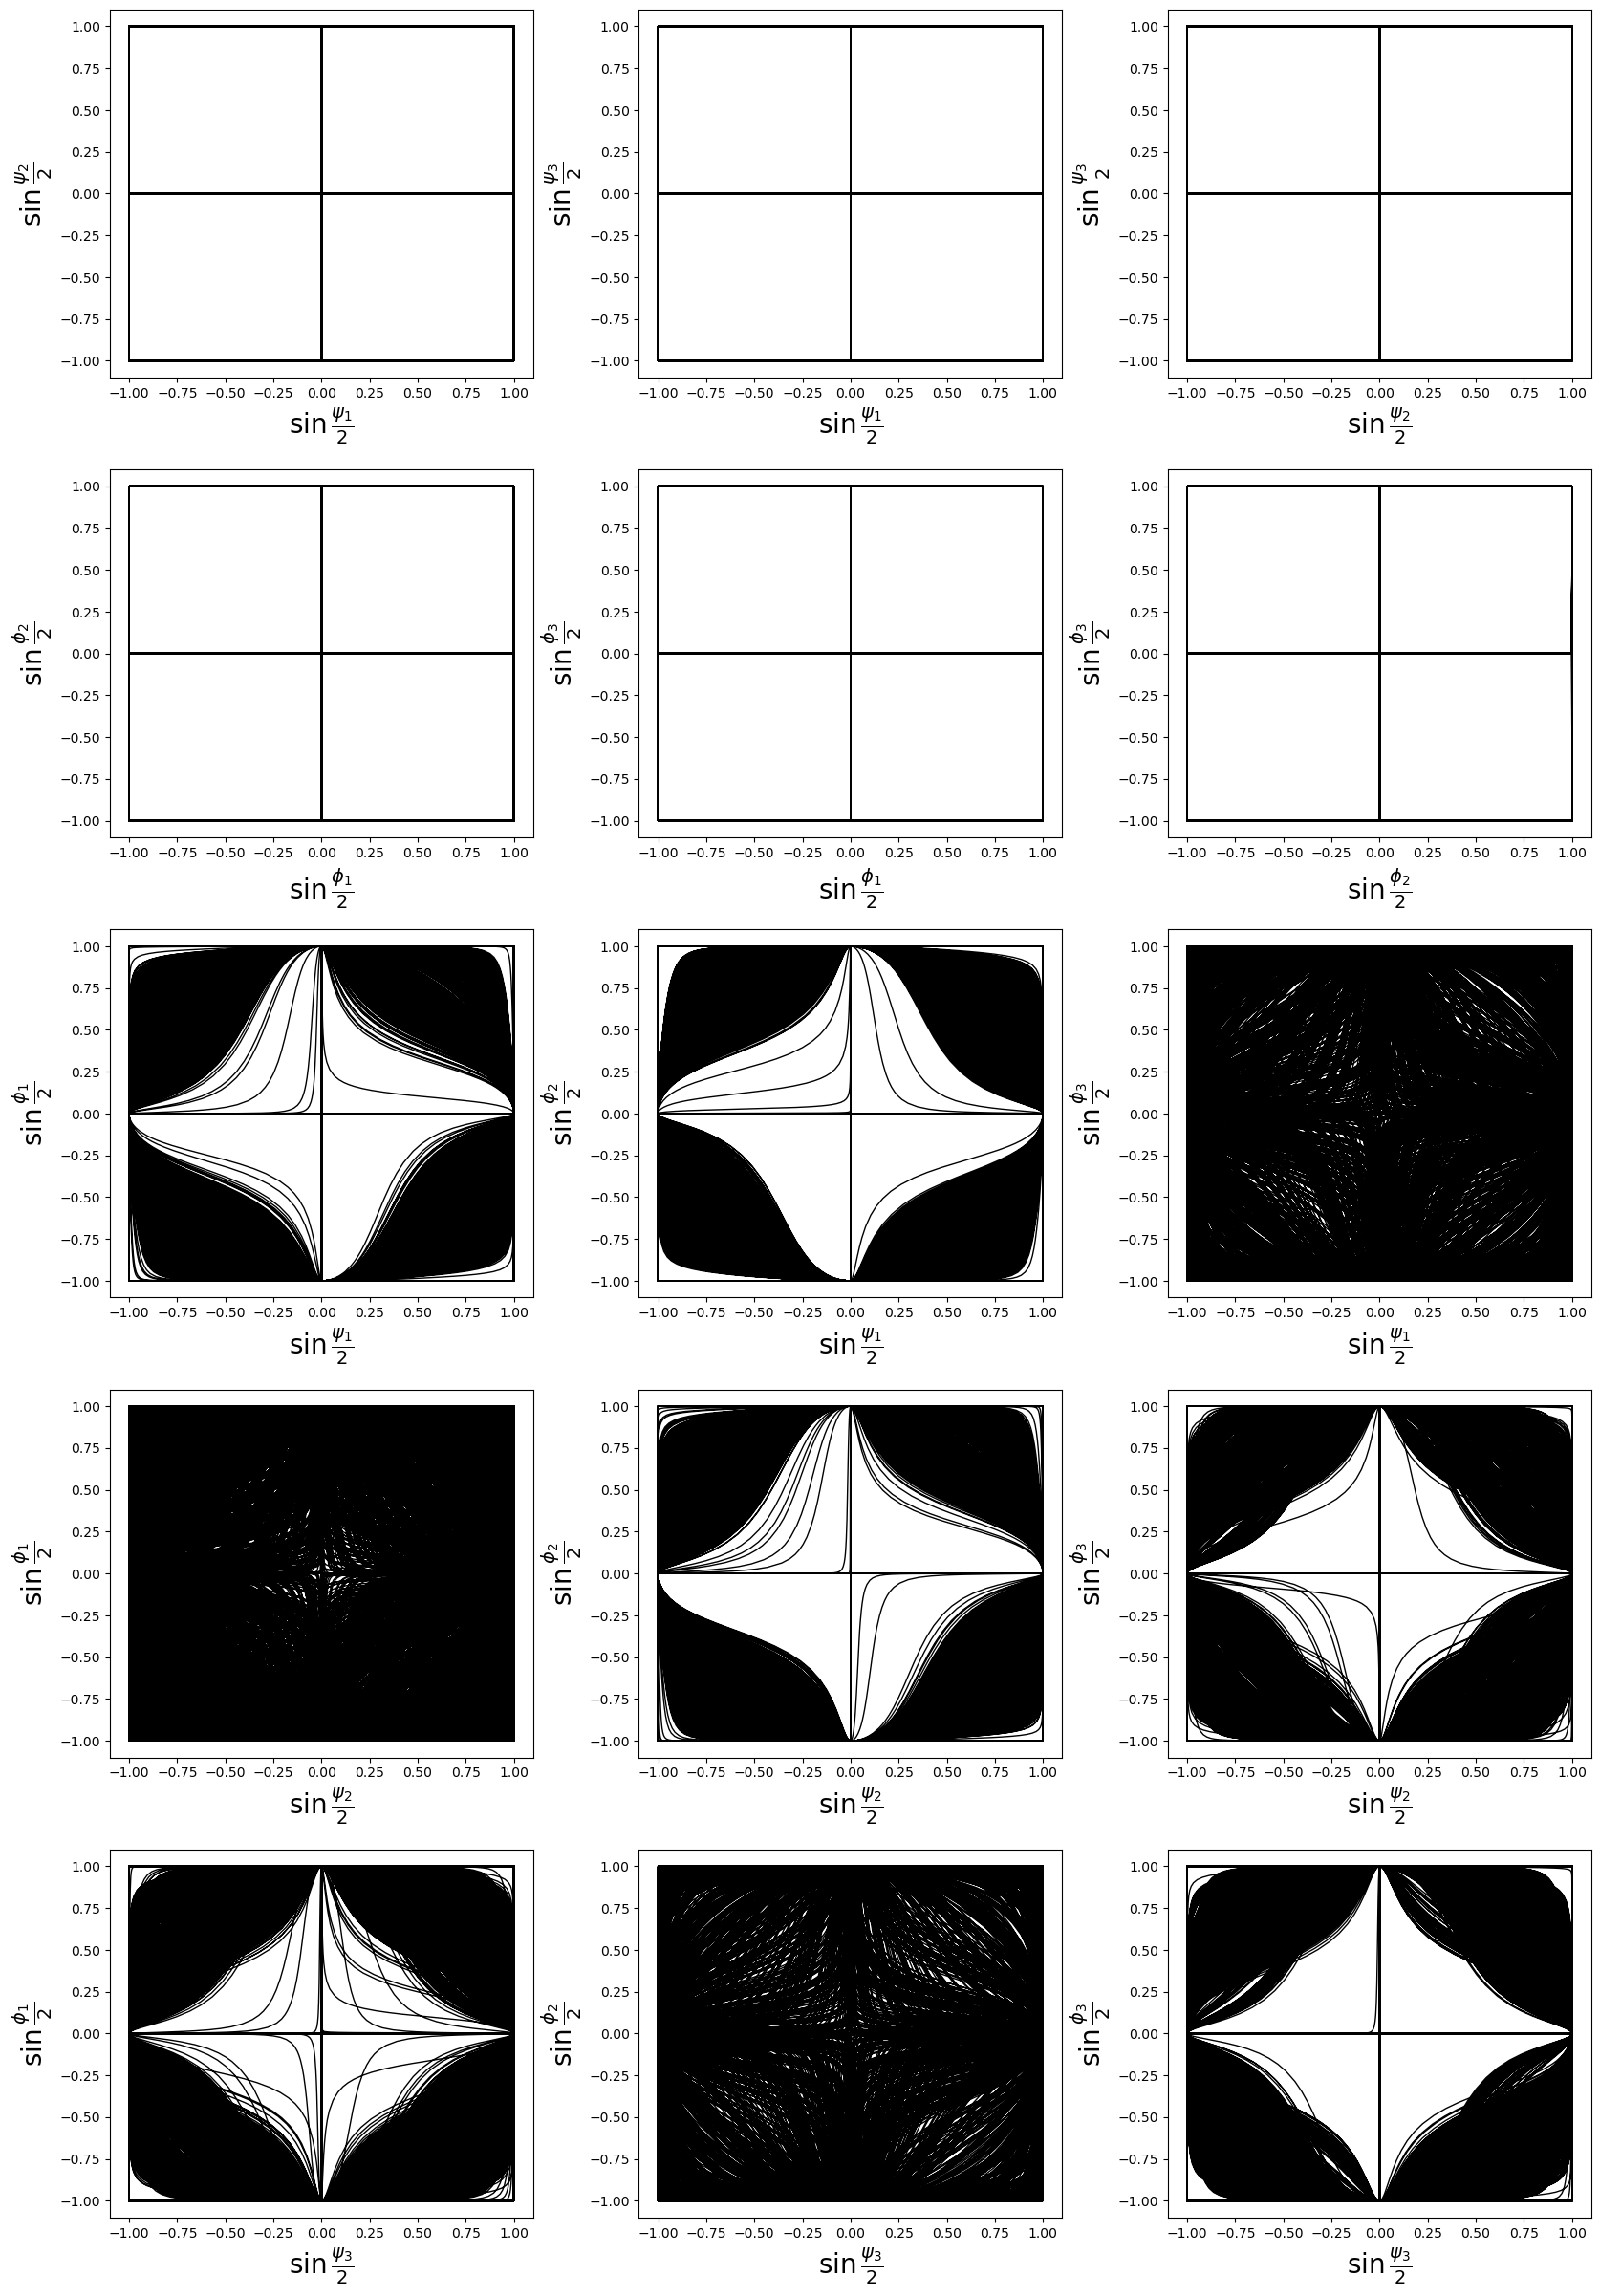

In [38]:
GU.plotProjections(sol, GU.projHalfSin, "tst-stuff.png", Dict("color" => "black", "linewidth" => 1))

# Отображение Пуанкаре

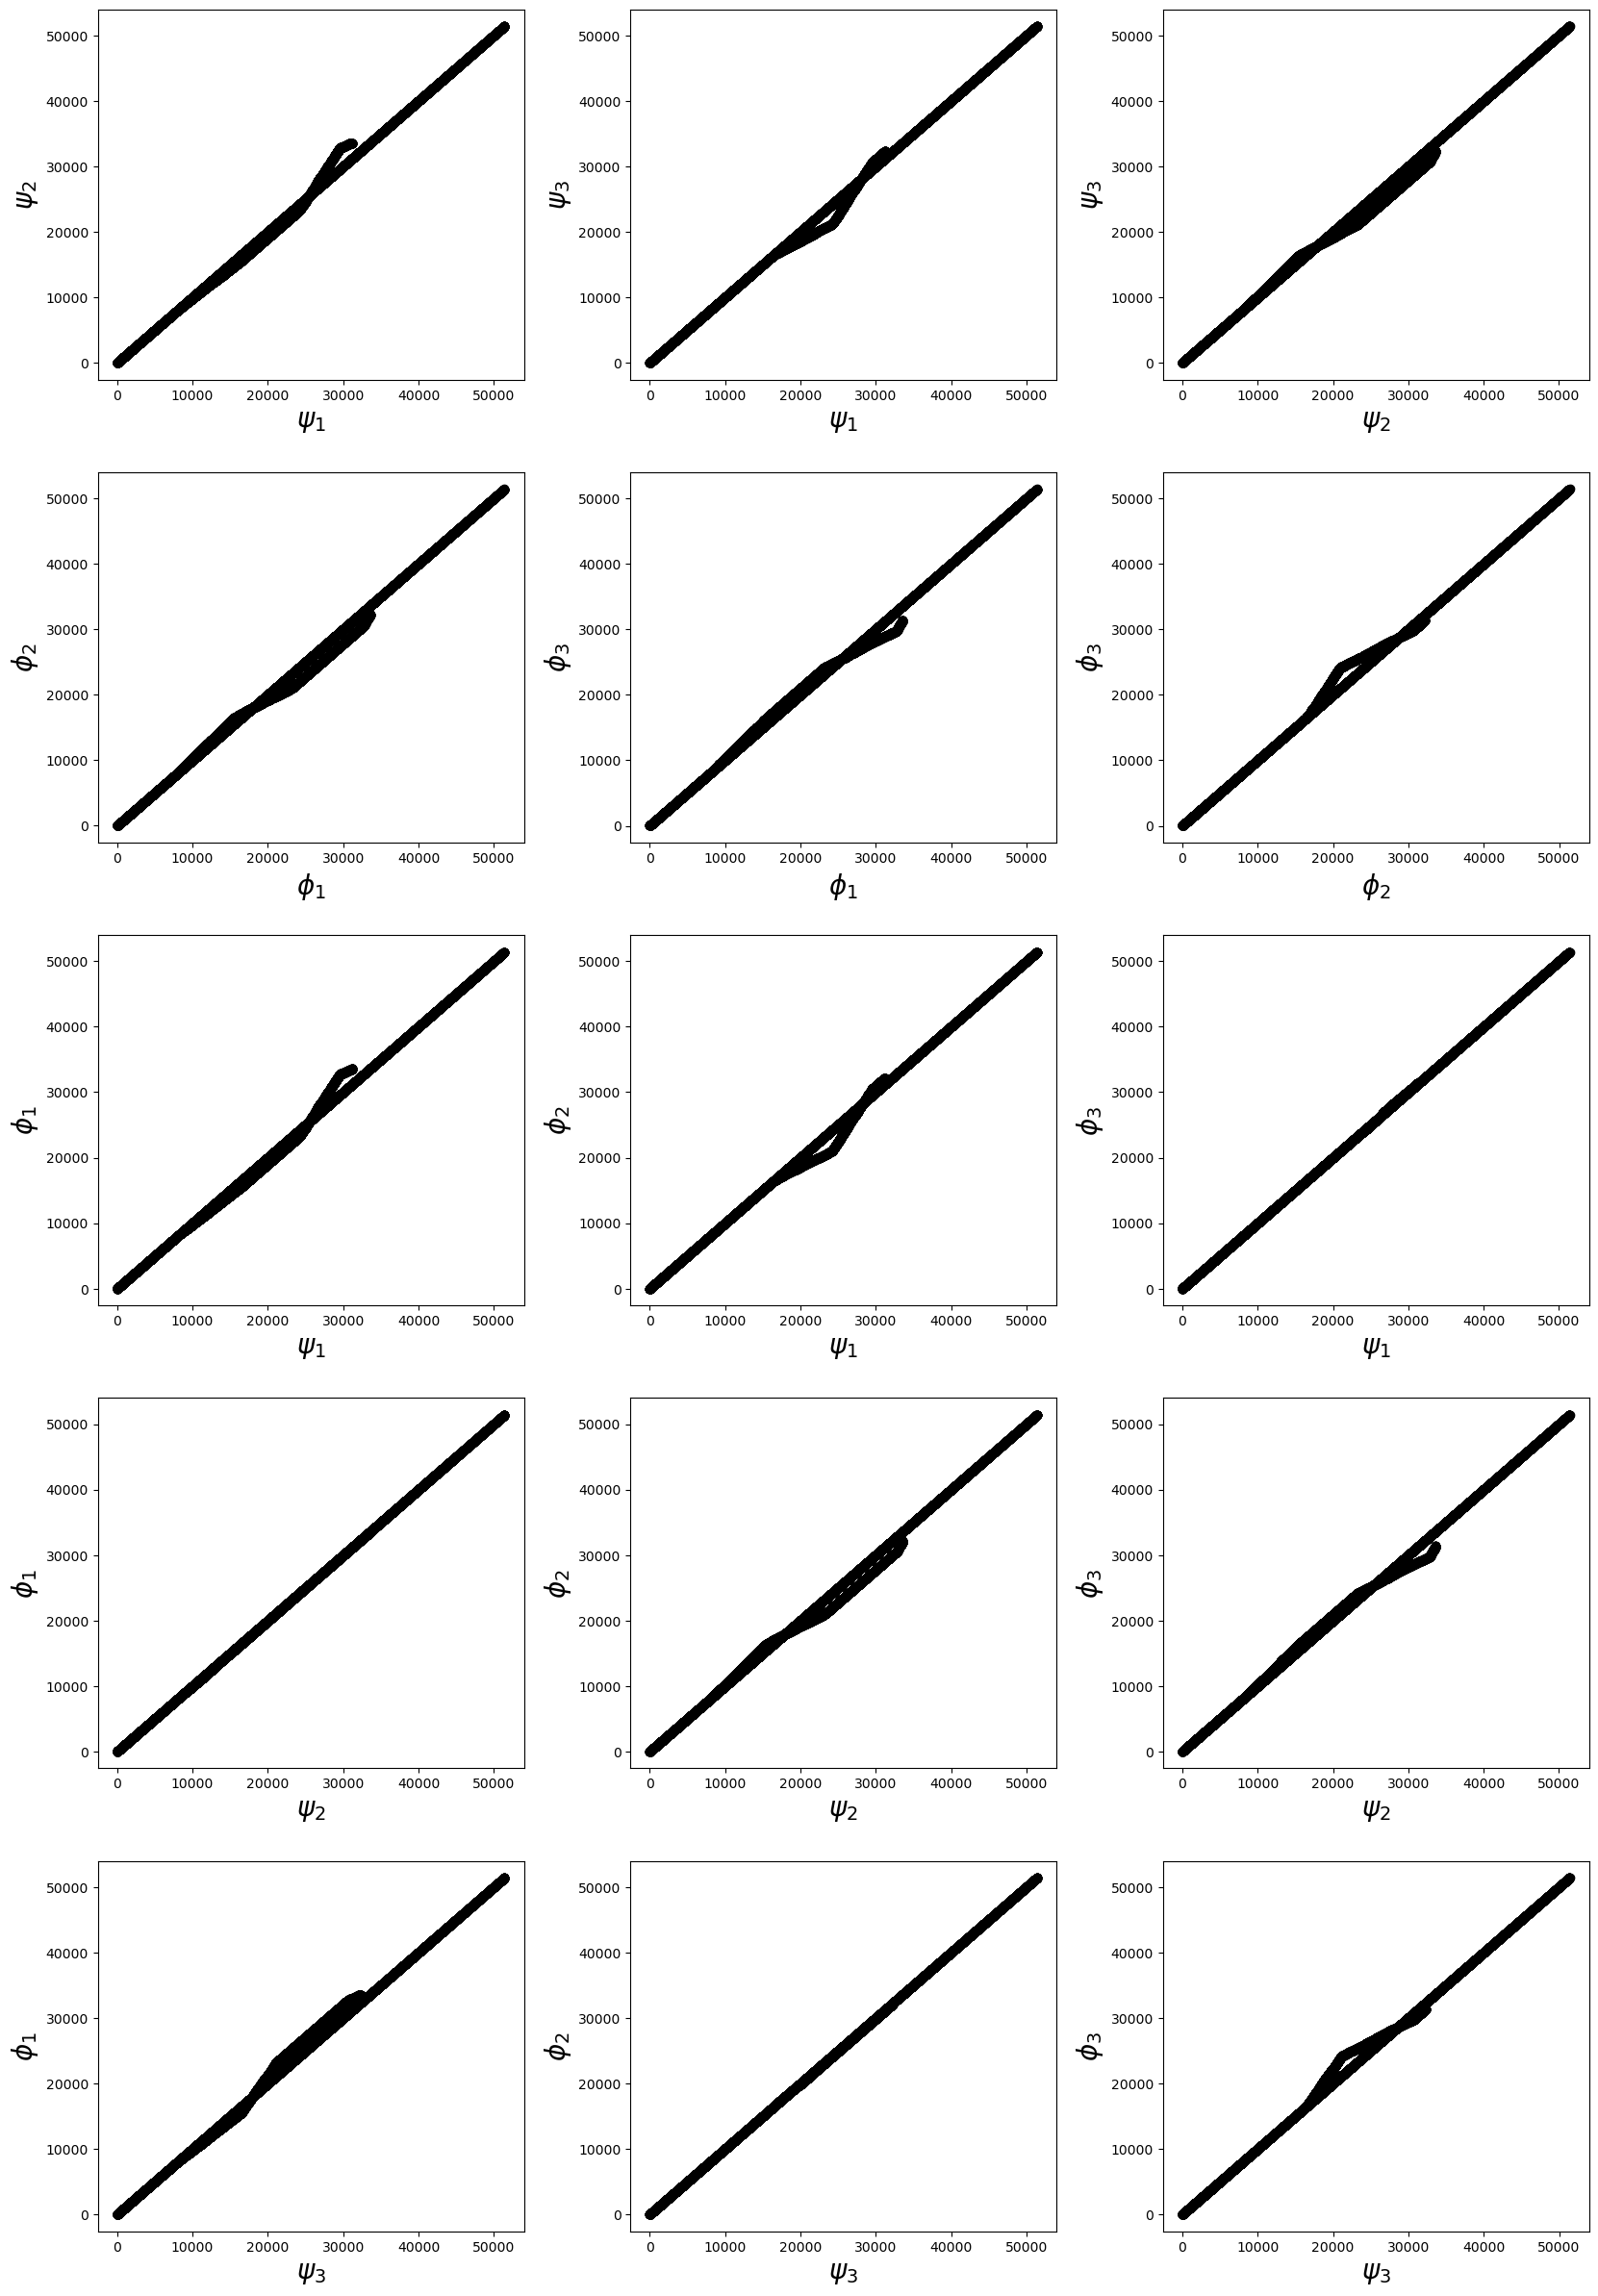

In [39]:
GU.plotPoincare(sol, GU.projNone, "tst-stuff.png", Dict("color" => "black", "linewidth" => 1))

# Время возврата на секущую

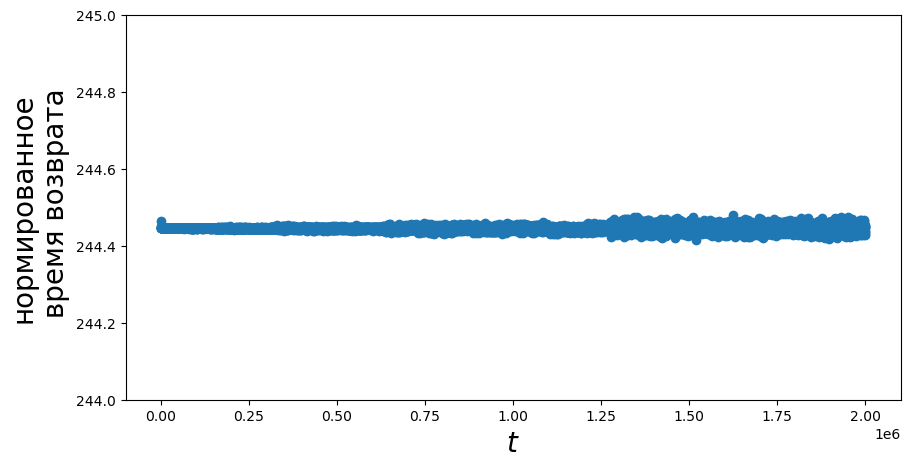

(244.0, 245.0)

In [42]:
fig = GU.plotreturnTime(sol, GU.projNone, "tst-stuff.png", Dict("color" => "black", "linewidth" => 1, "s" => 0.1))
fig.gca().set_ylim(244, 245)

# Диаграмма активности

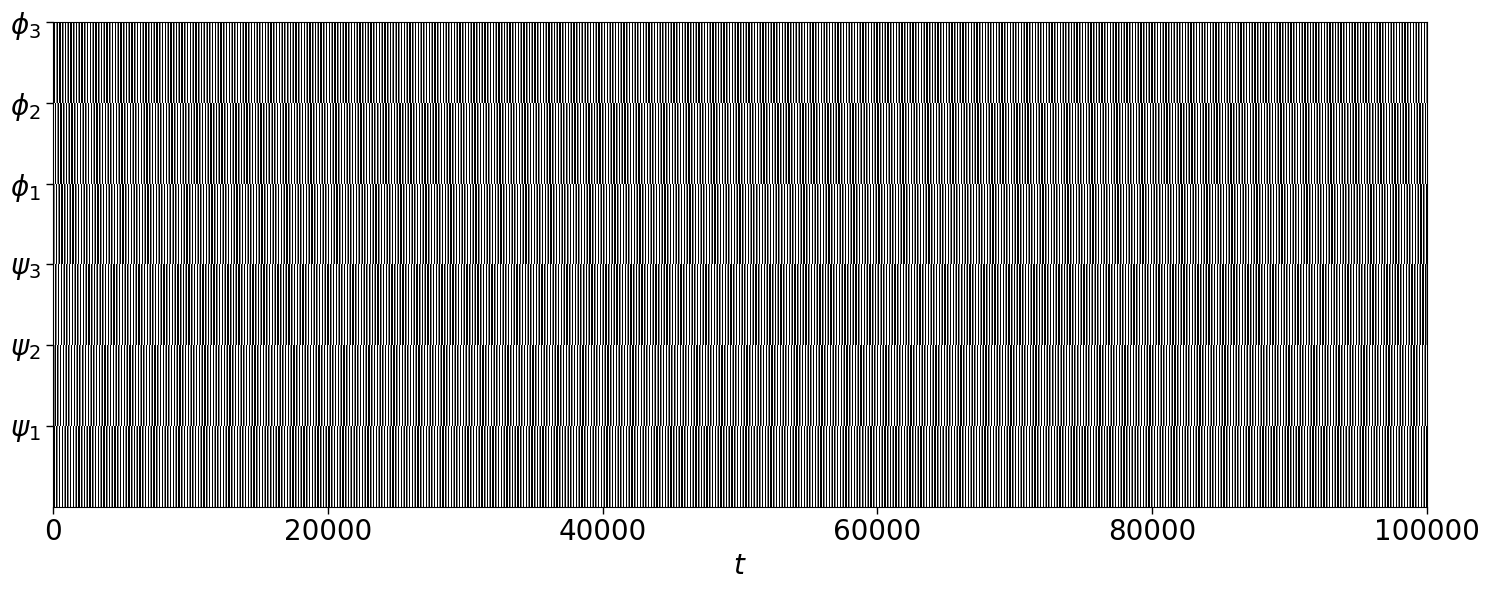

In [38]:
GU.plotActivationDiagram(sol, [L"\psi_1",L"\psi_2",L"\psi_3",L"\phi_1",L"\phi_2",L"\phi_3"], GU.ColorActivation([(0, 0, 0), (0.5, 0.5, 0.5), (1, 1, 1)], GU.normValue), "tst-stuff.png");

# Спектр Ляпуновксих показателей

In [49]:
lvDs = ContinuousDynamicalSystem(func, startPt, [K, a2, a4, r, Eps])

6-dimensional continuous dynamical system
 state:       [3.14149, 0.0001, 0.0001, 3.14149, 0.0001, 3.14149]
 rule f:      BS_Exp_Sys
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [0.4, 1.5708, 3.21228, 0.1, 1.0e-12]

In [50]:
lyaps = lyapunovspectrum(lvDs, 1000000; diffeq = (dt = 1e-3, Ttr = 10000, alg = alg, abstol = abstol, reltol = reltol, maxiters = 1e10), show_progress=true)

Lyapunov Spectrum: 100%|████████████████████████████████| Time: 0:00:38


6-element Vector{Float64}:
  0.3954471446626145
  0.39526743550808424
 -0.39993994934043614
 -0.400072202657019
 -1.1983655907495125
 -1.1985169282659656

In [47]:
lyaps = lyapunovspectrum(lvDs, 2000000; diffeq = (dt = 1e-3, Ttr = 10000, alg = alg, abstol = abstol, reltol = reltol, maxiters = 1e10), show_progress=true)

Lyapunov Spectrum: 100%|████████████████████████████████| Time: 0:01:16


6-element Vector{Float64}:
  0.39673007945644617
  0.3966402680373948
 -0.3999696793769917
 -0.4000360985793088
 -1.1998598624618138
 -1.199935543137767

In [48]:
lyaps = lyapunovspectrum(lvDs, 100000; diffeq = (dt = 1e-3, Ttr = 10000, alg = alg, abstol = abstol, reltol = reltol, maxiters = 1e10), show_progress=true)

Lyapunov Spectrum: 100%|████████████████████████████████| Time: 0:00:04


6-element Vector{Float64}:
  0.3631401075336189
  0.3609220429912841
 -0.3992079689588453
 -0.40092907513811965
 -1.268470580944721
 -1.271051945248889